### EDA및 시각화

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import streamlit as st

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False

In [2]:
football_df = pd.read_csv('../data/football_data.csv', encoding='utf-8-sig')
football_df.head()

Name  Age         Nation              Position  \
0  Aaron Cresswell   35        England             Left_Back   
1    Aaron Herrera   28      Guatemala            Right_Back   
2     Aaron Hickey   23       Scotland            Right_Back   
3       Aaron Long   32  United States           Centre_Back   
4    Aaron Molinas   24      Argentina  Attacking_Midfielder   

                 Club            League Confederation  Billion_KRW Field  OVR  \
0          Stoke City      Championship          UEFA          8.1    DF   74   
1         D.C. United               MLS      CONCACAF         32.5    DF   71   
2        Brentford FC     PremierLeague          UEFA        162.5    DF   76   
3      Los Angeles FC               MLS      CONCACAF         24.4    DF   70   
4  Defensa y Justicia  Liga_Profesional      CONMEBOL         48.8    MF   72   

   PAC  SHO  PAS  DRI  DEF  PHY             Name_ID  
0   59   59   74   74   75   62  aaroncresswell_ENG  
1   71   49   69   70   67   75    aaronherrera_GUA  
2   74   54   70   74   74   68     aaronhickey_SCO  
3   78   39   54   60   68   80       aaronlong_UNI  
4   73   57   72   76   51   63    aaronmolinas_ARG

- EDA 분석용으로 data 재조정

In [3]:
# Player 몸값 칼럼 재조정
football_df['Billion_KRW'] = football_df['Billion_KRW'].round(0).astype(int)
football_df.rename(columns={'Billion_KRW': 'MarketValue'}, inplace=True)

# EDA 분석용으로 세팅: 의미없는 ID 컬럼 삭제 
football_df.drop(columns=football_df.columns[-1], inplace=True)
football_df.to_csv('../data/football_eda.csv', index=False, encoding='utf-8-sig')

- 시각화 / EDA 분석 전용 데이터

In [2]:
football_df = pd.read_csv('../data/football_eda.csv', encoding='utf-8-sig') # 분석용 데이터
football_df.head() 

Name  Age         Nation              Position  \
0  Aaron Cresswell   35        England             Left_Back   
1    Aaron Herrera   28      Guatemala            Right_Back   
2     Aaron Hickey   23       Scotland            Right_Back   
3       Aaron Long   32  United States           Centre_Back   
4    Aaron Molinas   24      Argentina  Attacking_Midfielder   

                 Club            League Confederation  MarketValue Field  OVR  \
0          Stoke City      Championship          UEFA            8    DF   74   
1         D.C. United               MLS      CONCACAF           32    DF   71   
2        Brentford FC     PremierLeague          UEFA          162    DF   76   
3      Los Angeles FC               MLS      CONCACAF           24    DF   70   
4  Defensa y Justicia  Liga_Profesional      CONMEBOL           49    MF   72   

   PAC  SHO  PAS  DRI  DEF  PHY  
0   59   59   74   74   75   62  
1   71   49   69   70   67   75  
2   74   54   70   74   74   68  
3   78   39   54   60   68   80  
4   73   57   72   76   51   63

- 기초 통계분석

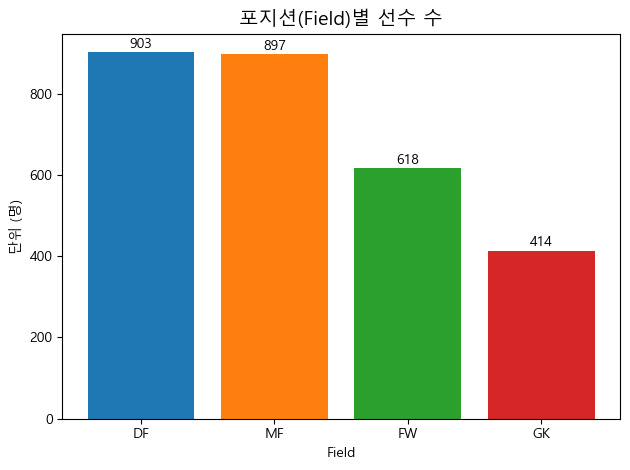

In [226]:
# 필드 포지션별 선수 수
field_counts = football_df['Field'].value_counts().reset_index()
field_counts.columns = ['Field', 'Count']
colors = plt.cm.tab10.colors[:len(field_counts)]
bars = plt.bar(field_counts['Field'], field_counts['Count'], color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 3, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title('포지션(Field)별 선수 수', fontsize=14)
plt.xlabel('Field')
plt.ylabel('단위 (명)')
plt.tight_layout()
plt.show()


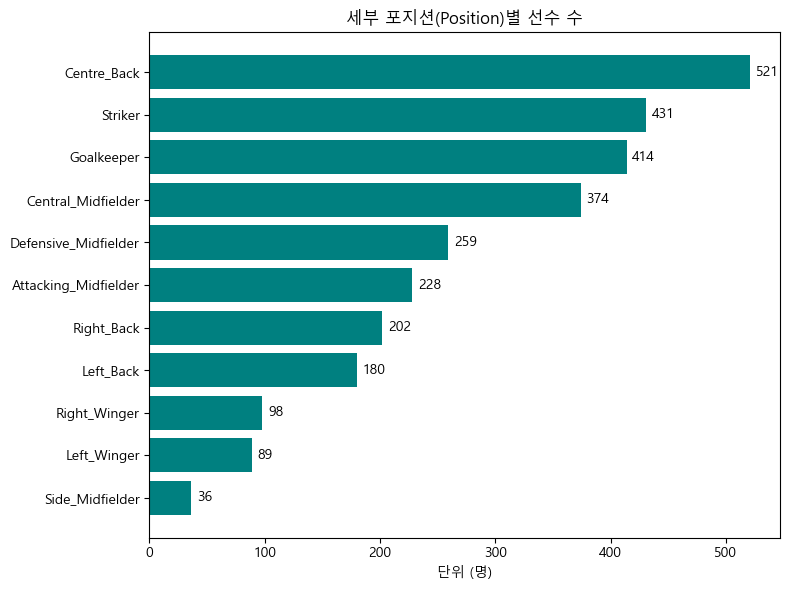

In [94]:
# 세부 포지션별 선수 수
position_counts = football_df['Position'].value_counts().reset_index()
position_counts.columns = ['Position', 'Count']

plt.figure(figsize=(8, 6))
bars = plt.barh(position_counts['Position'], position_counts['Count'], color='teal') 
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', fontsize=10)

plt.title('세부 포지션(Position)별 선수 수')
plt.xlabel('단위 (명)')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

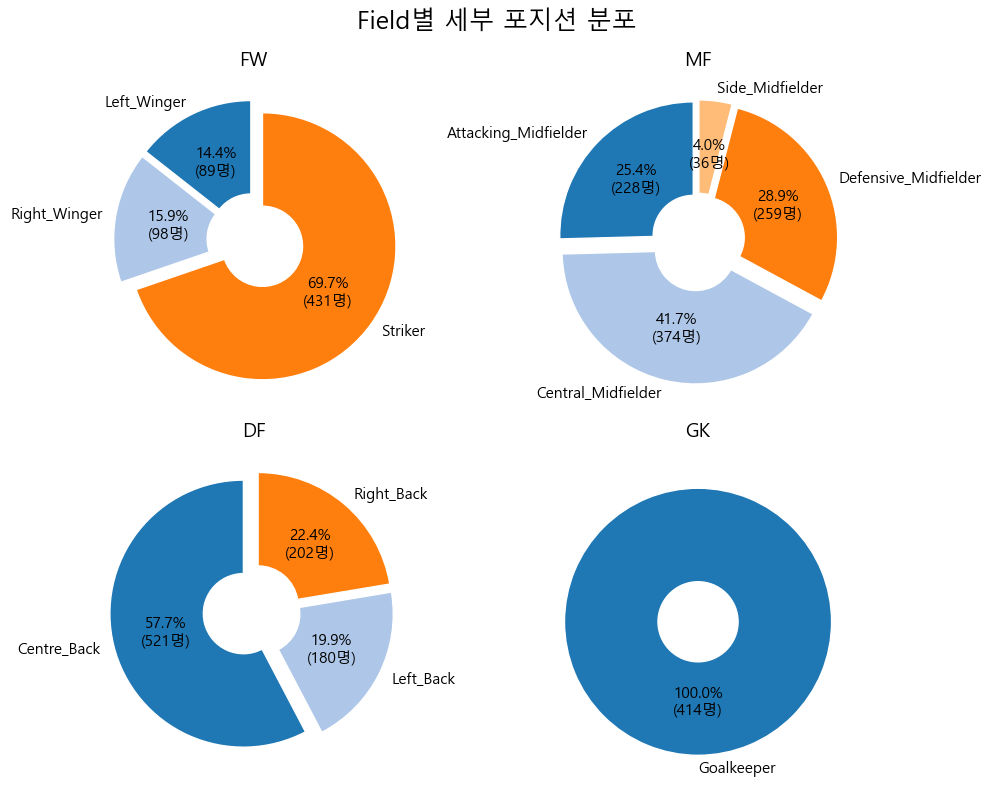

In [73]:
# 필드 포지션에서 세부 포지션 분포확인
grouped_fp = football_df.groupby(['Field', 'Position']).size().reset_index(name='Count')

ordered_fields = ['FW', 'MF', 'DF', 'GK']
colors = plt.cm.tab20.colors

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
fig.suptitle('Field별 세부 포지션 분포', fontsize=18)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count}명)'
    return my_autopct

for i, field in enumerate(ordered_fields):
    data = grouped_fp[grouped_fp['Field'] == field]
    counts = data['Count'].values
    explode = [0.08 if j == counts.argmax() else 0.05 for j in range(len(counts))]

    wedges, texts, autotexts = axes[i].pie(
        counts,
        labels=data['Position'],
        autopct=make_autopct(counts),
        colors=colors[:len(counts)],
        explode=explode,
        wedgeprops={'width': 0.7, 'edgecolor': 'w'},
        startangle=90,
        textprops={'fontsize': 11}
    )
    axes[i].set_title(field, fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

In [9]:
# 국가별 등록 선수 수
nation_counts = football_df['Nation'].value_counts().reset_index()
nation_counts.columns = ['Nation', 'Count']
nation_counts

Nation  Count
0              England    188
1               France    151
2            Argentina    150
3              Germany    131
4        United States    131
..                 ...    ...
111  Equatorial Guinea      1
112            Grenada      1
113             Cyprus      1
114           Thailand      1
115             Jordan      1

[116 rows x 2 columns]

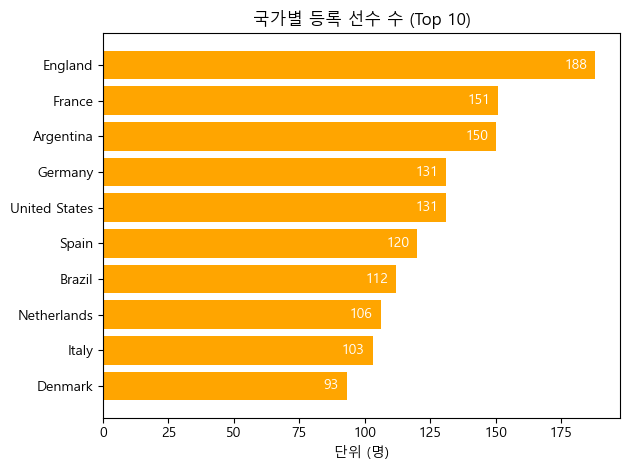

In [ ]:
# 국가별 등록 선수 수 Top 10 시각화
nation_counts10 = football_df['Nation'].value_counts().head(10).reset_index()
nation_counts10.columns = ['Nation', 'Count']

bars = plt.barh(nation_counts10['Nation'], nation_counts10['Count'], color='orange')
for bar in bars:
    width = bar.get_width()
    plt.text(width - 3, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', va='center', ha='right', fontsize=10, color='white')

plt.xlabel('단위 (명)')
plt.title('국가별 등록 선수 수 (Top 10)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# 국가별 등록 선수 분포 시각화 (Plotly 지도 기반 버블 차트)
nation_counts = football_df['Nation'].value_counts().reset_index()
nation_counts.columns = ['Nation', 'Count']

fig = px.scatter_geo(
    nation_counts,
    locations='Nation',                   
    locationmode='country names',         
    size='Count',                         
    color='Count',                        
    size_max=50,                          
    projection='natural earth',
    title='국가별 선수 분포 (Bubble Chart on Map)',
    color_continuous_scale='Plasma'       
)
# 커스텀 hover 템플릿 지정
fig.update_traces(hovertemplate='<b>%{location}</b><br>선수 수: %{marker.size}명')
fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()

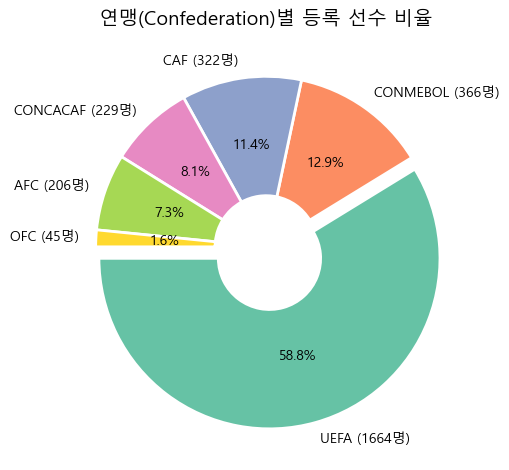

In [ ]:
# 대륙(연맹)별 등록 선수 수
confederation_counts = football_df['Confederation'].value_counts().reset_index()
confederation_counts.columns = ['Confederation', 'Count']

labels = confederation_counts['Confederation']
sizes = confederation_counts['Count']
colors = plt.cm.Set2.colors

max_index = sizes.idxmax()
explode = [0.07 if i == max_index else 0 for i in range(len(sizes))]
custom_labels = [f'{name} ({count}명)' for name, count in zip(labels, sizes)]
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

plt.pie(
    sizes,
    labels=custom_labels,
    colors=colors[:len(labels)],
    autopct='%.1f%%',
    startangle=180,
    wedgeprops=wedgeprops,
    explode=explode
)
plt.title('연맹(Confederation)별 등록 선수 비율', fontsize=14)
plt.tight_layout()
plt.show()

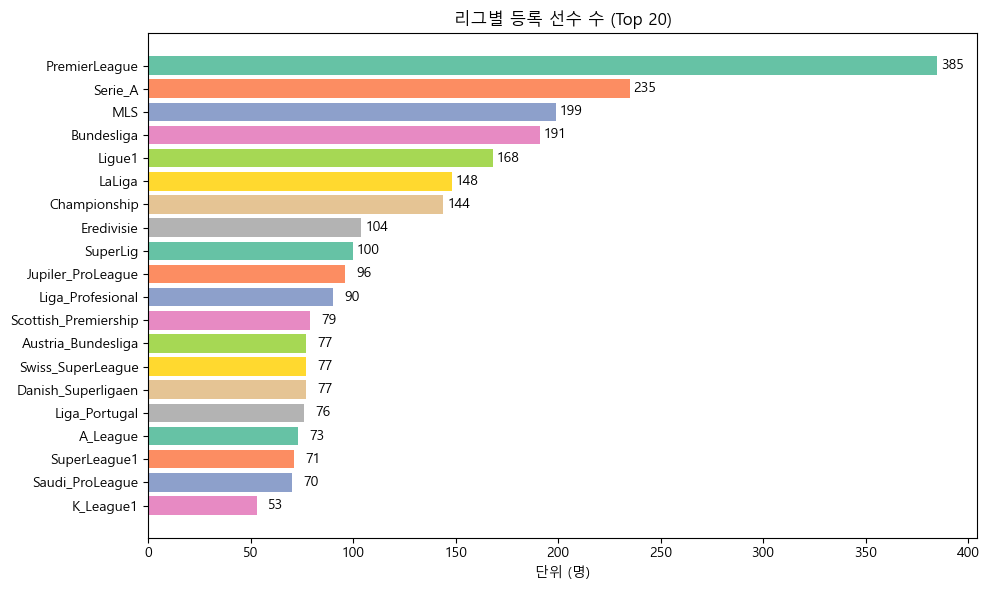

In [92]:
# 등록 선수가 가장 많은 리그 TOP 10
league_counts20 = football_df['League'].value_counts().head(20).reset_index()
league_counts20.columns = ['League', 'Count']

Set2 = plt.cm.Set2.colors
plt.figure(figsize=(10, 6))
bars = plt.barh(league_counts20['League'], league_counts20['Count'], color=Set2)

# 수치 라벨 추가
for bar in bars:
    width = bar.get_width()
    plt.text(width + 13, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', ha='right', color='black')

plt.xlabel('단위 (명)')
plt.title('리그별 등록 선수 수 (Top 20)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

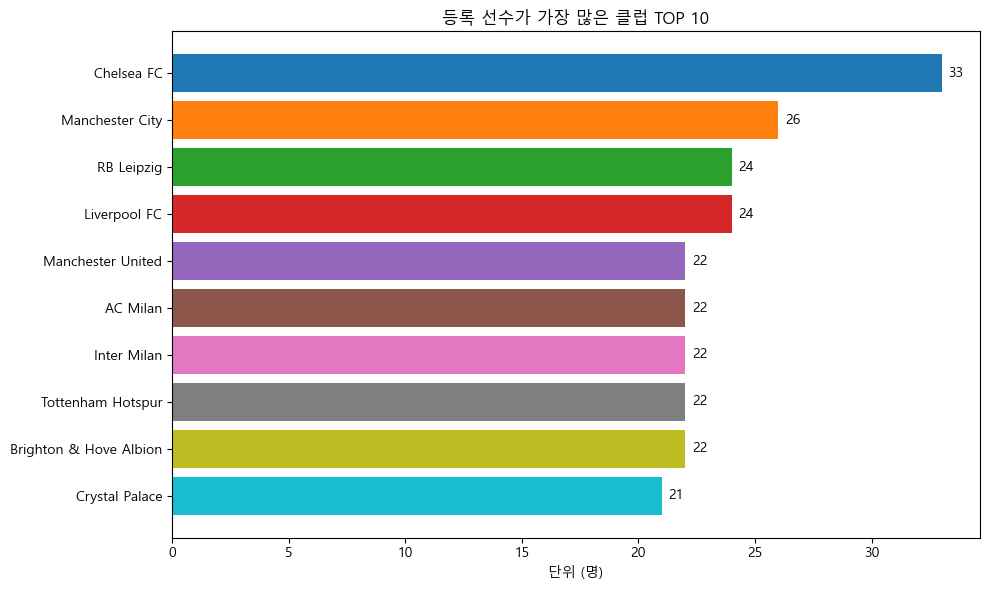

In [91]:
# 등록 선수가 가장 많은 팀 TOP 10
club_counts10 = football_df['Club'].value_counts().head(10).reset_index()
club_counts10.columns = ['Club', 'Count']

tab10 = plt.cm.tab10.colors
plt.figure(figsize=(10, 6))
bars = plt.barh(club_counts10['Club'], club_counts10['Count'], color=tab10)

for bar in bars:
    plt.text(bar.get_width() + 0.3,                               
             bar.get_y() + bar.get_height()/2,  
             f'{int(bar.get_width())}',       
             va='center', ha='left', color='black', fontsize=10)

plt.xlabel('단위 (명)')
plt.title('등록 선수가 가장 많은 클럽 TOP 10')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

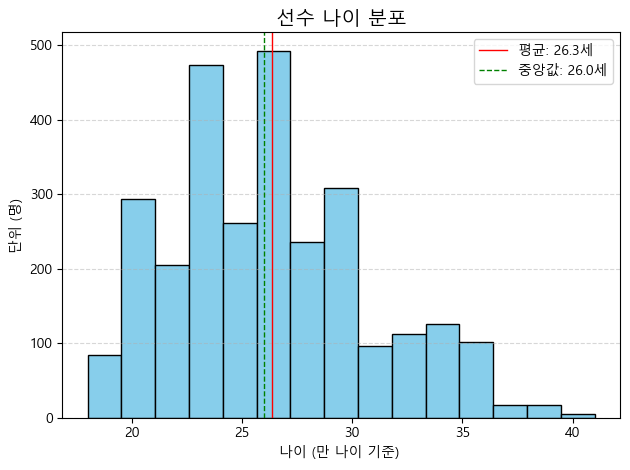

In [112]:
# 나이 데이터 분포 시각화
plt.hist(football_df['Age'], bins=15, color='skyblue', edgecolor='black')

mean_age = football_df['Age'].mean()
median_age = football_df['Age'].median()

plt.axvline(mean_age, color='red', linewidth=1, label=f'평균: {mean_age:.1f}세')
plt.axvline(median_age, color='green', linewidth=1, linestyle='--', label=f'중앙값: {median_age:.1f}세')
plt.legend()

plt.title('선수 나이 분포', fontsize=14)
plt.xlabel('나이 (만 나이 기준) ')
plt.ylabel('단위 (명)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [120]:
# 무소속 선수만 추출
nonclub_df = football_df[football_df['Club'] == 'Without Club']
nonclub_df[['Name', 'Age', 'Position', 'Nation', 'Club', 'MarketValue','OVR']]

Name  Age              Position  Nation          Club  \
1670  Lukasz Fabianski   40            Goalkeeper  Poland  Without Club   
2301       Raul Albiol   39           Centre_Back   Spain  Without Club   
2384       Roy Krishna   37               Striker    Fiji  Without Club   
2543    Steve Mandanda   40            Goalkeeper  France  Without Club   
2611     Thomas Partey   32  Defensive_Midfielder   Ghana  Without Club   

      MarketValue  OVR  
1670            8   77  
2301           16   79  
2384            2   69  
2543            8   78  
2611          228   82

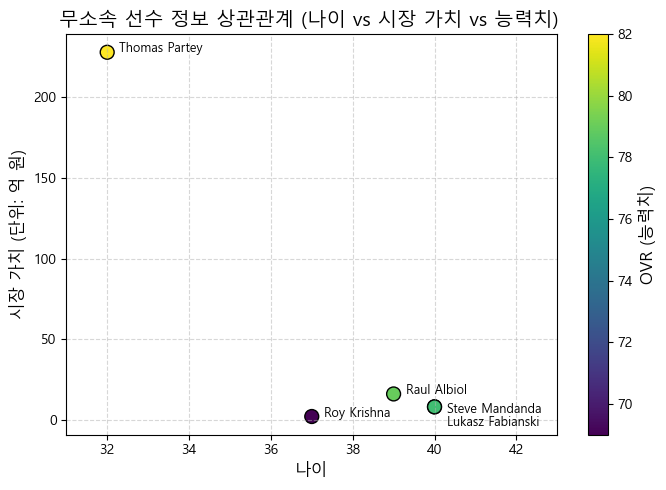

In [ ]:
# 무소속 선수 정보 상관관계
nonclub_df = football_df[football_df['Club'] == 'Without Club']

plt.figure(figsize=(7, 5))
sc = plt.scatter(
    nonclub_df['Age'],
    nonclub_df['MarketValue'],
    s=100,
    c=nonclub_df['OVR'],
    cmap='viridis',
    edgecolors='black'
)

cbar = plt.colorbar(sc)
cbar.set_label('OVR (능력치)', fontsize=12)

for age in nonclub_df['Age'].unique():
    same_age_players = nonclub_df[nonclub_df['Age'] == age]
    
    if len(same_age_players) == 1:
        row = same_age_players.iloc[0]
        plt.text(row['Age'] + 0.3, row['MarketValue'], row['Name'], fontsize=9)
    else: # OVR 높은 순으로 정렬하여 위, 아래 배치
        sorted_players = same_age_players.sort_values(by='OVR', ascending=False).reset_index(drop=True)
        if len(sorted_players) >= 1:
            top = sorted_players.iloc[0]
            plt.text(top['Age'] + 0.3, top['MarketValue'] - 4, top['Name'], fontsize=9)
        if len(sorted_players) >= 2:
            bottom = sorted_players.iloc[-1]
            plt.text(bottom['Age'] + 0.3, bottom['MarketValue'] - 12, bottom['Name'], fontsize=9)

plt.xlim(nonclub_df['Age'].min() - 1, 43)

plt.title('무소속 선수 정보 상관관계 (나이 vs 시장 가치 vs 능력치) ', fontsize=14)
plt.xlabel('나이', fontsize=12)
plt.ylabel('시장 가치 (단위: 억 원)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


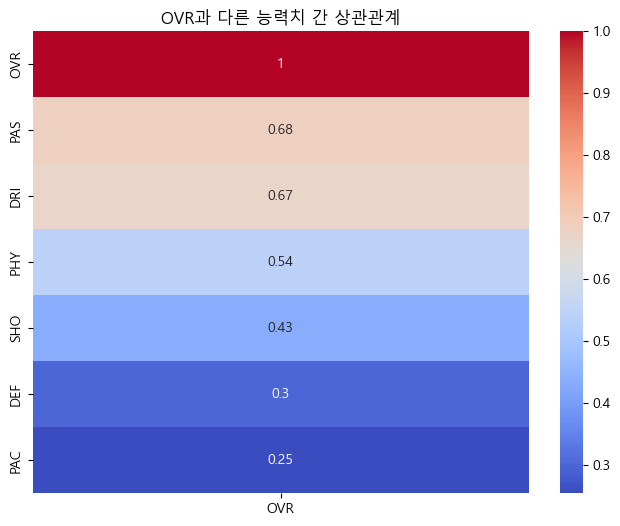

In [ ]:
# OVR과 각 능력치 간 상관계수 계산
stat_cols = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'OVR']
corr = football_df[stat_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr[['OVR']].sort_values(by='OVR', ascending=False), annot=True, cmap='coolwarm')
plt.title('OVR과 다른 능력치 간 상관관계')
plt.show()

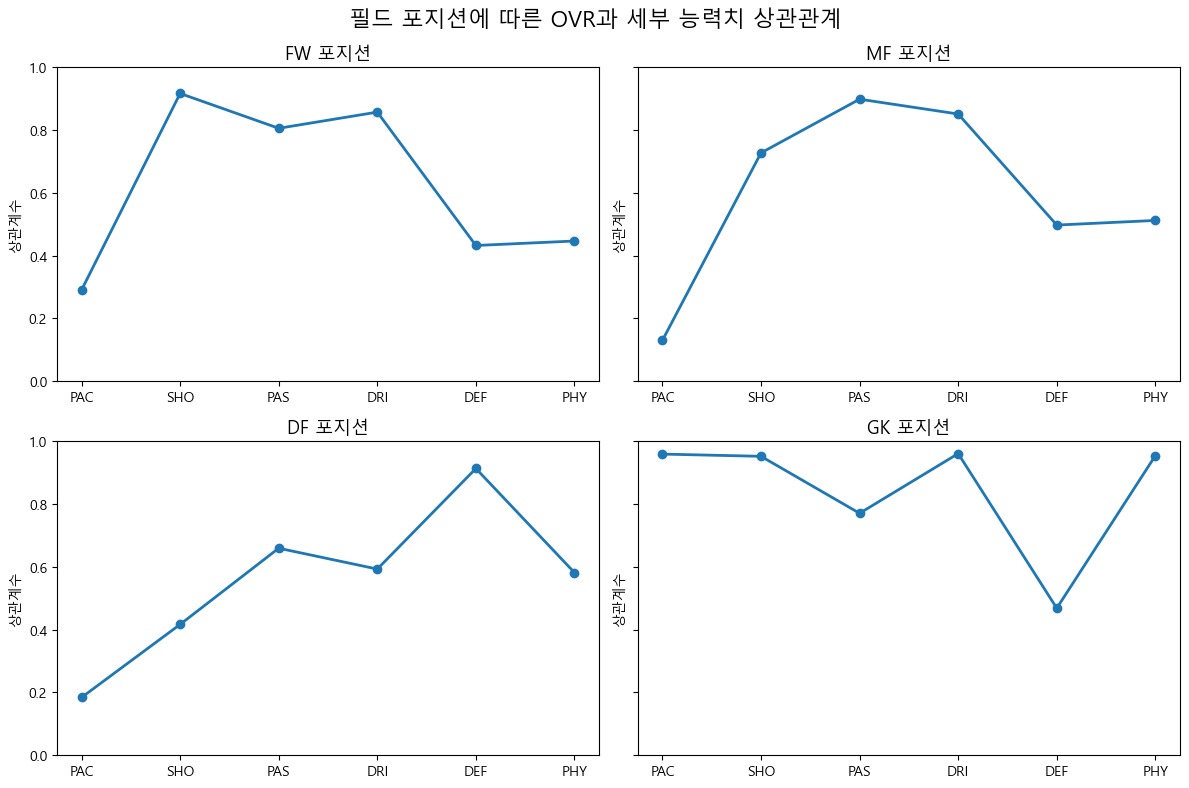

In [184]:
# 필드 포지션에 따른 OVR과 세부 능력치 상관관계
stats_cols = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']
positions = ['FW', 'MF', 'DF', 'GK']

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
axes = axes.flatten()

for idx, pos in enumerate(positions):
    sub_df = football_df[football_df['Field'] == pos]
    corr = sub_df[stats_cols + ['OVR']].corr()['OVR'].drop('OVR')
    axes[idx].plot(corr.index,corr.values,marker='o',linewidth=2)
    axes[idx].set_ylim(0, 1)
    axes[idx].set_title(f'{pos} 포지션', fontsize=13)
    axes[idx].set_ylabel('상관계수')

plt.suptitle('필드 포지션에 따른 OVR과 세부 능력치 상관관계', fontsize=16)
plt.tight_layout()
plt.show()

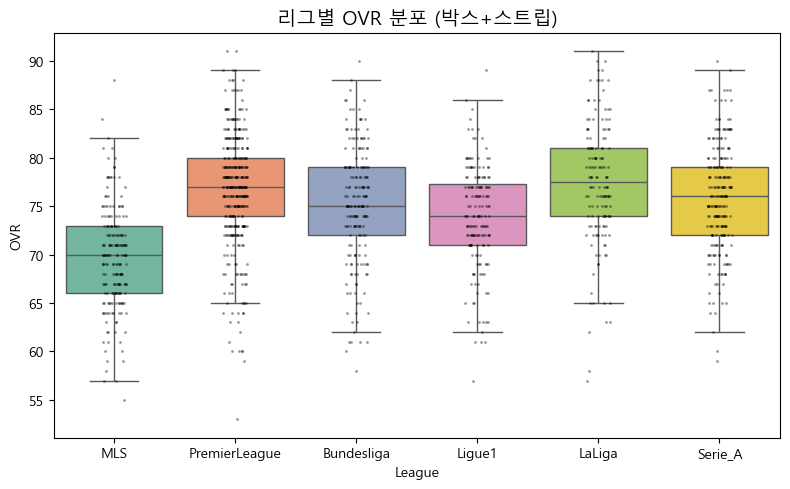

In [218]:
# 주요 리그별 OVR 분포
top_leagues = football_df['League'].value_counts().nlargest(6).index

plt.figure(figsize=(8, 5))
sns.boxplot(data=football_df[football_df['League'].isin(top_leagues)],x='League',y='OVR',hue='League',palette='Set2',showfliers=False,dodge=False,legend=False)
sns.stripplot(data=football_df[football_df['League'].isin(top_leagues)],x='League', y='OVR', color='black', size=2, jitter=True, alpha=0.4)

plt.title('리그별 OVR 분포 (박스+스트립)', fontsize=14)
plt.tight_layout()
plt.show()

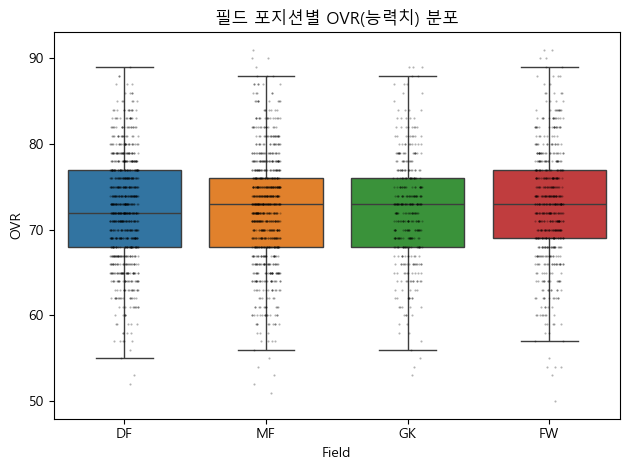

In [224]:
# 필드 포지션별 OVR(능력치) 분포
sns.boxplot(data=football_df,x='Field',y='OVR',hue='Field',palette='tab10',showfliers=False)
sns.stripplot(data=football_df, x='Field',y='OVR',color='black', size=1.5,jitter=True, alpha=0.3)

plt.title('필드 포지션별 OVR(능력치) 분포')
plt.ylabel('OVR')
plt.tight_layout()
plt.show()

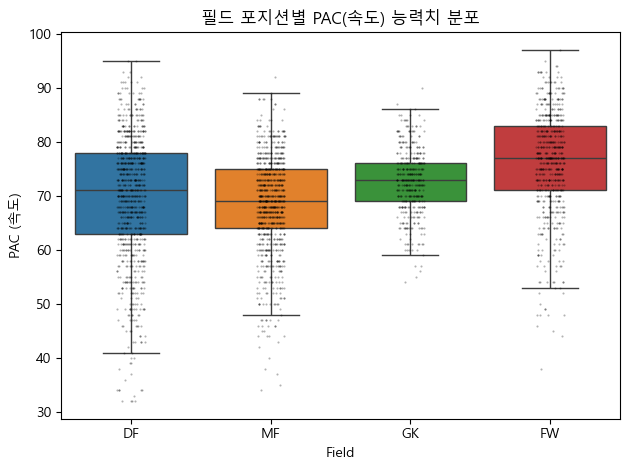

In [220]:
# 필드 포지션별 PAC(속도)능력치 분포
sns.boxplot(data=football_df,x='Field',y='PAC',hue='Field',palette='tab10',showfliers=False)
sns.stripplot(data=football_df,x='Field', y='PAC',color='black', size=1.5, jitter=True, alpha=0.3)

plt.title('필드 포지션별 PAC(속도) 능력치 분포',)
plt.ylabel('PAC (속도)')
plt.tight_layout()
plt.show()

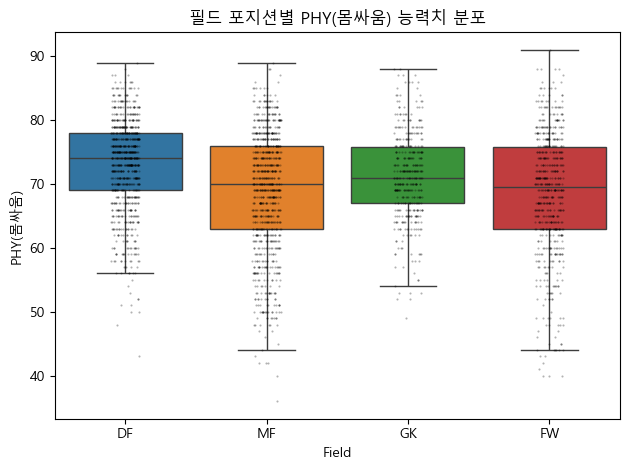

In [216]:
# 필드 포지션별 PHY(몸싸움) 능력치 분포
sns.boxplot(data=football_df,x='Field',y='PHY',hue='Field',palette='tab10',showfliers=False)
sns.stripplot(data=football_df,x='Field', y='PHY',color='black', size=1.5, jitter=True, alpha=0.3)

plt.title('필드 포지션별 PHY(몸싸움) 능력치 분포',)
plt.ylabel('PHY(몸싸움)')
plt.tight_layout()
plt.show()

In [230]:
# 국가별 평균 MarketValue 계산
nation_value = football_df.groupby('Nation')['MarketValue'].mean().reset_index()
nation_value.columns = ['Nation', 'AvgMarketValue']

fig = px.scatter_geo(
    nation_value,
    locations='Nation',
    locationmode='country names',
    size='AvgMarketValue',
    color='AvgMarketValue',
    size_max=50,
    projection='natural earth',
    title='국가 별 선수 평균 시장 가치 (Transfermarkt 기준)',
    color_continuous_scale='Viridis'
)

fig.update_traces(hovertemplate='<b>%{location}</b><br>선수 평균가치: 약 %{marker.size:.2f}억 원')
fig.update_layout(geo=dict(showframe=False, showcountries=True, showcoastlines=True))
fig.show()

In [232]:
# 국가별 총 MarketValue 계산
nation_value_sum = football_df.groupby('Nation')['MarketValue'].sum().reset_index()
nation_value_sum.columns = ['Nation', 'TotalMarketValue']
nation_value_sum['TotalMarketValue_str'] = nation_value_sum['TotalMarketValue'].apply(lambda x: f"{x:,.2f}")

fig = px.scatter_geo(
    nation_value_sum,
    locations='Nation',
    locationmode='country names',
    size='TotalMarketValue',
    color='TotalMarketValue',
    size_max=60,
    projection='natural earth',
    title='국가별 선수 총 시장 누적가치 (Transfermarkt 기준)',
    color_continuous_scale='Turbo'
)
fig.update_traces(
    customdata=nation_value_sum[['TotalMarketValue_str']],
    hovertemplate='<b>%{location}</b><br>총 시장 가치: %{customdata[0]}억 원'
)
fig.update_layout(geo=dict(showframe=False, showcountries=True, showcoastlines=True))
fig.show()

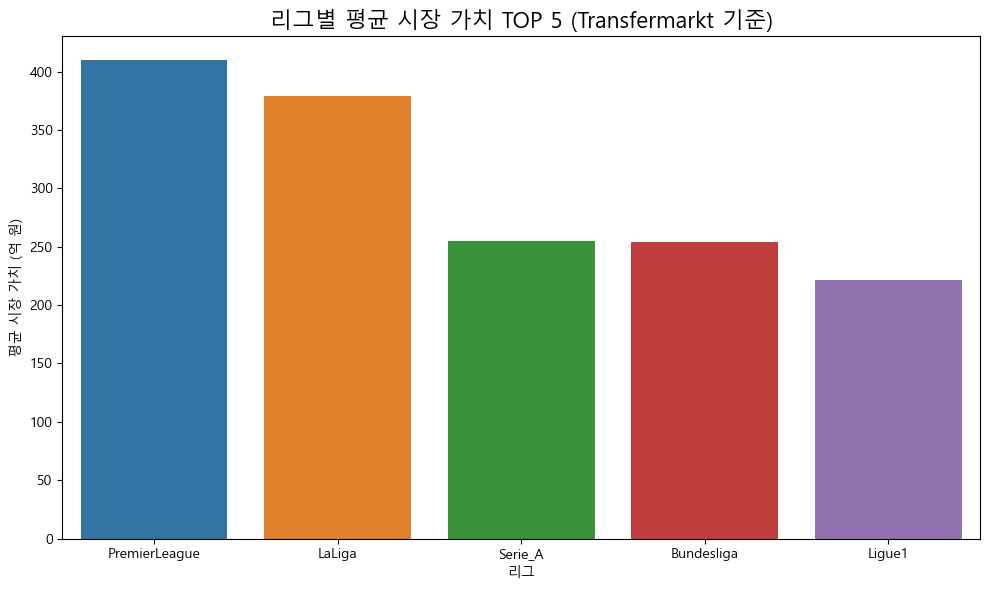

In [251]:
# 평균 MarketValue 상위 5개 리그 선택
league_value_avg = football_df.groupby('League')['MarketValue'].mean().reset_index()
league_value_avg.columns = ['League', 'AvgMarketValue']
top_avg_leagues = league_value_avg.sort_values(by='AvgMarketValue', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_avg_leagues,x='League',y='AvgMarketValue',hue='League', palette='tab10', dodge=False,legend=False)

plt.title('리그별 평균 시장 가치 TOP 5 (Transfermarkt 기준)', fontsize=16)
plt.xlabel('리그')
plt.ylabel('평균 시장 가치 (억 원)')
plt.tight_layout()
plt.show()


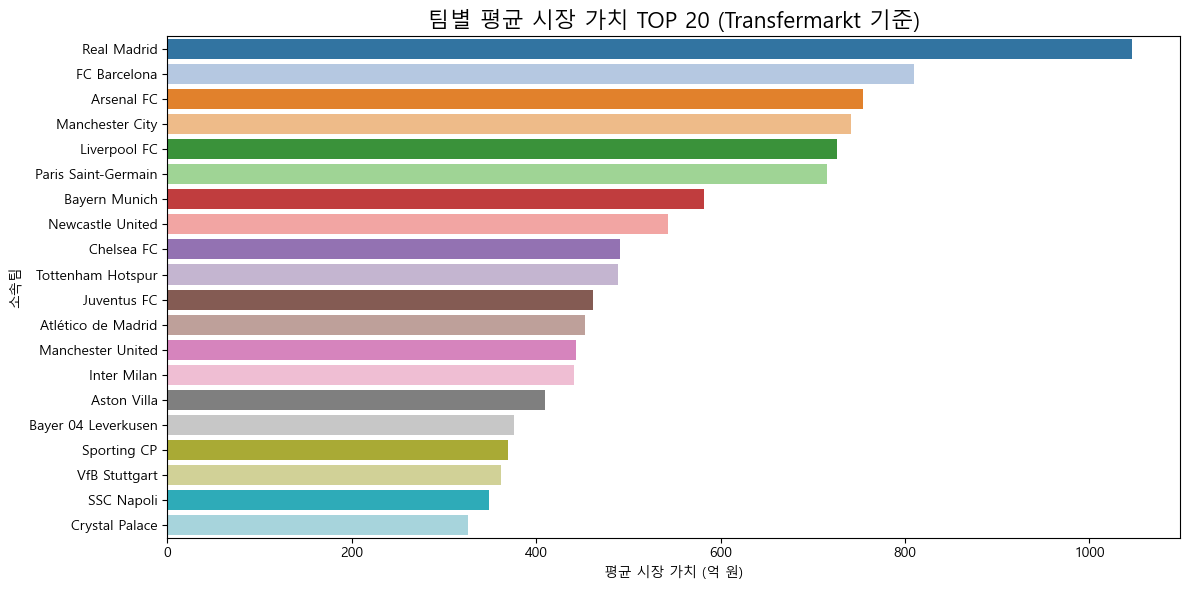

In [250]:
# 팀(클럽)별 평균 MarketValue 계산 후 상위 20개 추출
club_value_avg = football_df.groupby('Club')['MarketValue'].mean().reset_index()
club_value_avg.columns = ['Club', 'AvgMarketValue']
top_avg_clubs = club_value_avg.sort_values(by='AvgMarketValue', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_avg_clubs,x='AvgMarketValue',y='Club',hue='Club',palette='tab20',dodge=False,legend=False)

plt.title('팀별 평균 시장 가치 TOP 20 (Transfermarkt 기준)', fontsize=16)
plt.xlabel('평균 시장 가치 (억 원)')
plt.ylabel('소속팀')
plt.tight_layout()
plt.show()


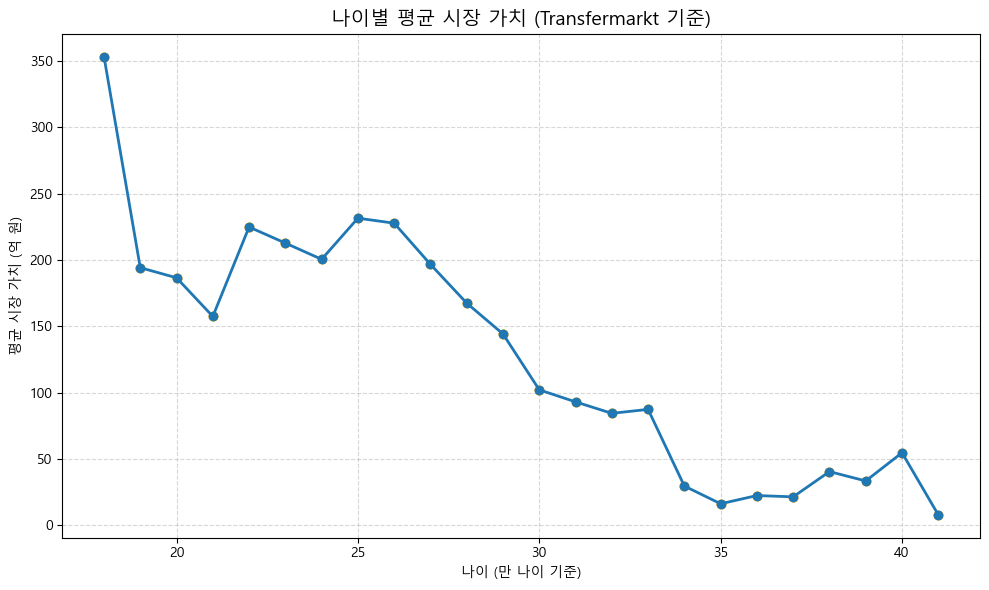

In [254]:
# 나이별 평균 MarketValue 계산
age_value_avg = football_df.groupby('Age')['MarketValue'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(age_value_avg['Age'], age_value_avg['MarketValue'], marker='o', linewidth=2, label='평균 시장 가치')
plt.scatter(age_value_avg['Age'], age_value_avg['MarketValue'], color='orange', s=40)

plt.title('나이별 평균 시장 가치 (Transfermarkt 기준)', fontsize=14)
plt.xlabel('나이 (만 나이 기준)')
plt.ylabel('평균 시장 가치 (억 원)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

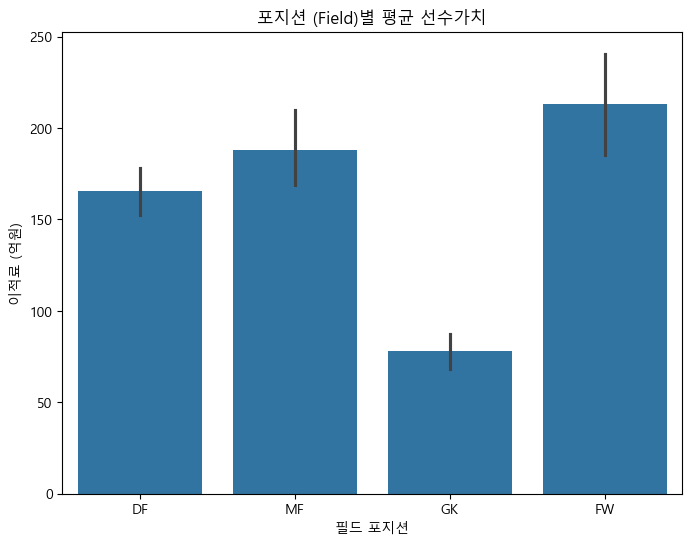

In [10]:
# 포지션 (Field)별 평균 선수가치
plt.figure(figsize=(8, 6))
sns.barplot(data=football_df, x='Field', y='MarketValue', estimator='mean')
plt.title('포지션 (Field)별 평균 선수가치')
plt.xlabel('필드 포지션')
plt.ylabel('이적료 (억원)')
plt.show()

In [70]:
# 포지션별 평균 시장 가치 및 선수 수 계산
custom_order = [
    'Striker', 'Right_Winger', 'Left_Winger', 'Attacking_Midfielder',
    'Central_Midfielder', 'Side_Midfielder', 'Defensive_Midfielder',
    'Centre_Back', 'Right_Back', 'Left_Back', 'Goalkeeper'
]

position_value = football_df.groupby('Position').agg(AvgMarketValue=('MarketValue', 'mean'),PlayerCount=('MarketValue', 'count')).reset_index()
position_value['Position'] = pd.Categorical(position_value['Position'], categories=custom_order, ordered=True)
position_value = position_value.sort_values('Position')

fig = px.scatter(
    position_value,
    x='Position',
    y='AvgMarketValue',
    size='PlayerCount',
    color='Position',
    hover_name='Position',
    size_max=60,
    title='포지션별 평균 시장 가치 (Transfermarkt 기준)'
)

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    xaxis_title='포지션',
    yaxis_title='평균 시장 가치 (억 원)',
    title_font_size=16,
    showlegend=False
)
fig.show()

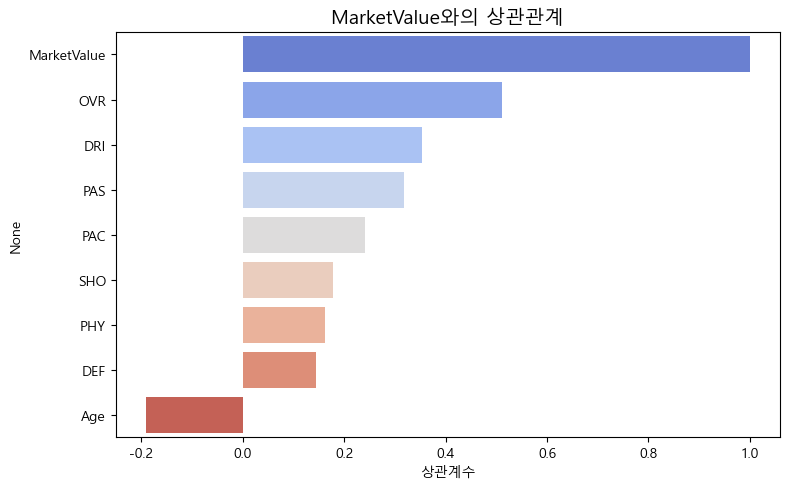

In [ ]:
# 시장가치와 상관관계
numeric_cols = football_df.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()
marketvalue_corr = corr_matrix['MarketValue'].sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=marketvalue_corr.values, y=marketvalue_corr.index, hue=marketvalue_corr.index,palette='coolwarm')
plt.title('MarketValue와의 상관관계', fontsize=14)
plt.xlabel('상관계수')
plt.tight_layout()
plt.show()

이 그래프는 OVR이 가장 높은 선수 20명의 시장 가치 순위가 꼭 OVR 순위와 일치하는지를 시각적으로 확인할 수 있도록 도와줍니다.

즉, OVR이 높지만 MarketValue가 낮은 선수가 있다면 그 선수가 저평가되었을 수도 있고, 거품이 있는 선수도 보일 수 있습니다.

In [76]:
# 1. 산점도로 OVR vs MarketValue 비교
plot_df = football_df[['Name', 'Position', 'Age', 'Nation', 'Club', 'OVR', 'MarketValue']].copy()
plot_df['customdata'] = plot_df[['Name', 'Position', 'Age', 'Nation', 'Club']].values.tolist()

fig = px.scatter(
    plot_df,
    x='OVR',
    y='MarketValue',
    color='Position',
    title='시장가치 vs 종합능력치 산점도 (Transfermarkt 기준)',
    labels={'OVR': 'OVR (종합 능력치)', 'MarketValue': 'MarketValue (억 원)'},
    opacity=0.6,
    width=900,
    height=600
)
fig.update_traces(
    marker=dict(size=8, line=dict(width=0.5, color='DarkSlateGrey')),
    customdata=plot_df[['Name', 'Position', 'Age', 'Nation', 'Club']],
    hovertemplate=(
        '<b>%{customdata[0]}</b><br>' +
        '나이: %{customdata[2]}<br>' +
        '국적: %{customdata[3]}<br>' +
        '소속 클럽: %{customdata[4]}<br>' +
        '포지션: %{customdata[1]}<br>' +
        'OVR: %{x}<br>' +
        '시장가치: 약 %{y}억 원<extra></extra>'
    )
)

fig.update_layout(title_font_size=16, showlegend=False)
fig.show()

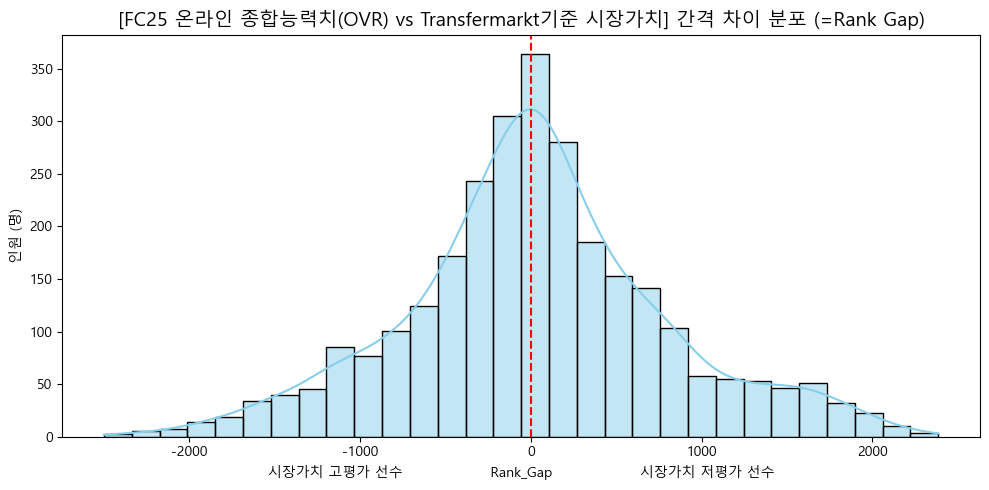

In [77]:
# 2. OVR 순위 vs MarketValue 순위 비교하여 랭킹 차이 계산
ranked_df = football_df.copy()

# OVR과 MarketValue 순위 계산
ranked_df['OVR_Rank'] = ranked_df['OVR'].rank(method='min', ascending=False).astype(int)
ranked_df['Value_Rank'] = ranked_df['MarketValue'].rank(method='min', ascending=False).astype(int)

# 순위 차이 계산 (양수 = 저평가, 음수 = 고평가)
ranked_df['Rank_Gap'] = ranked_df['Value_Rank'] - ranked_df['OVR_Rank'].astype(int)
ranked_df['Status'] = ranked_df['Rank_Gap'].apply(lambda x: 'under-valued' if x > 0 else ('over-valued' if x < 0 else 'suitable'))

overvalued_df = ranked_df.sort_values(by='Rank_Gap', ascending=True)
undervalued_df = ranked_df.sort_values(by='Rank_Gap', ascending=False)

# 랭킹 차이 분포 보기
plt.figure(figsize=(10, 5))
sns.histplot(ranked_df['Rank_Gap'], bins=30, kde=True, color='skyblue')
plt.axvline(0, color='red', linestyle='--')
plt.title('[FC25 온라인 종합능력치(OVR) vs Transfermarkt기준 시장가치] 간격 차이 분포 (=Rank Gap)', fontsize=14)
plt.xlabel('시장가치 고평가 선수                  Rank_Gap                  시장가치 저평가 선수')
plt.ylabel('인원 (명)')
plt.tight_layout()
plt.show()

In [55]:
# 고평가 선수 TOP 10 추출 (Rank_Gap이 가장 낮은 선수)
overvalued_df[['Name','Age','Club','Field','OVR','MarketValue','OVR_Rank','Value_Rank','Rank_Gap','Status']].head(10)

Name  Age               Club Field  OVR  MarketValue  \
2681   Tyler Dibling   19     Southampton FC    FW   59          406   
2267  Pietro Comuzzo   20     ACF Fiorentina    DF   60          406   
515    Conrad Harder   20        Sporting CP    FW   62          390   
473       Chris Rigg   18     Sunderland AFC    MF   61          325   
2206   Patrick Dorgu   20  Manchester United    DF   64          406   
1185  Javi Rodriguez   22      Celta de Vigo    DF   57          244   
1729     Marc Casado   21       FC Barcelona    MF   65          488   
2360    Rodrigo Mora   18           FC Porto    MF   66          650   
935   Geovany Quenda   18        Sporting CP    FW   67          731   
855     Finn Jeltsch   19      VfB Stuttgart    DF   65          325   

      OVR_Rank  Value_Rank  Rank_Gap       Status  
2681      2769         270     -2499  over-valued  
2267      2737         270     -2467  over-valued  
515       2664         325     -2339  over-valued  
473       2706         377     -2329  over-valued  
2206      2540         270     -2270  over-valued  
1185      2801         549     -2252  over-valued  
1729      2451         206     -2245  over-valued  
2360      2352         116     -2236  over-valued  
935       2246         100     -2146  over-valued  
855       2451         377     -2074  over-valued

In [56]:
# 저평가 선수 TOP 10 추출 (Rank_Gap이 가장 높은 선수)
undervalued_df[['Name','Age','Club','Field','OVR','MarketValue','OVR_Rank','Value_Rank','Rank_Gap','Status']].head(10)

Name  Age                          Club Field  OVR  \
1406  Kasper Schmeichel   38                     Celtic FC    GK   80   
580               Dante   41                      OGC Nice    DF   79   
844    Fernando Muslera   39  Club Estudiantes de La Plata    GK   81   
2536       Stefan Savic   34                   Trabzonspor    DF   81   
800         Ever Banega   37          CA Newell's Old Boys    MF   79   
2543     Steve Mandanda   40                  Without Club    GK   78   
1768          Mario Rui   34                    SSC Napoli    DF   79   
603        David Ospina   36             Atlético Nacional    GK   77   
2065   Nicolas Otamendi   37                    SL Benfica    DF   81   
327             Ben Mee   35                  Brentford FC    DF   78   

      MarketValue  OVR_Rank  Value_Rank  Rank_Gap        Status  
1406            8       274        2660      2386  under-valued  
580             8       343        2660      2317  under-valued  
844            13       219        2511      2292  under-valued  
2536           15       219        2477      2258  under-valued  
800            12       343        2555      2212  under-valued  
2543            8       452        2660      2208  under-valued  
1768           13       343        2511      2168  under-valued  
603             6       578        2743      2165  under-valued  
2065           16       219        2362      2143  under-valued  
327            11       452        2570      2118  under-valued

Rank_Gap > 0: OVR은 높은데 MarketValue가 낮은 선수 → 저평가

Rank_Gap < 0: MarketValue가 더 높음 → 고평가

OVR과 MarketValue가 모두 상위권인데 Rank_Gap도 크다면 → 주목할 만한 이상치

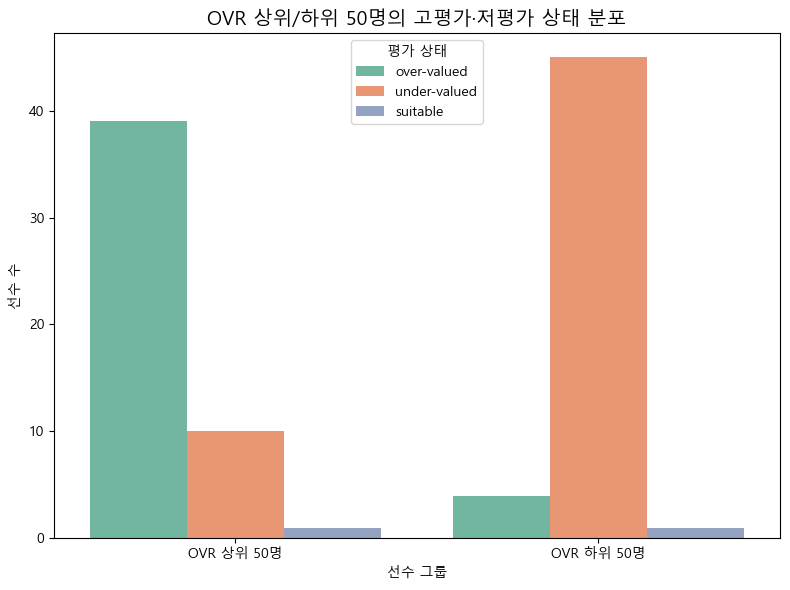

In [78]:
# OVR 상위/하위 50명의 고평가·저평가 상태 분포
high_value_players = ranked_df.sort_values('MarketValue', ascending=False).head(50)
low_value_players = ranked_df.sort_values('MarketValue', ascending=True).head(50)

high_counts = high_value_players['Status'].value_counts().reset_index()
high_counts.columns = ['Status', 'Count']
high_counts['Group'] = 'OVR 상위 50명'

low_counts = low_value_players['Status'].value_counts().reset_index()
low_counts.columns = ['Status', 'Count']
low_counts['Group'] = 'OVR 하위 50명'

status_compare_df = pd.concat([high_counts, low_counts])

plt.figure(figsize=(8, 6))
sns.barplot(data=status_compare_df, x='Group', y='Count', hue='Status', palette='Set2')

plt.title('OVR 상위/하위 50명의 고평가·저평가 상태 분포', fontsize=14)
plt.xlabel('선수 그룹')
plt.ylabel('선수 수')
plt.legend(title='평가 상태')
plt.tight_layout()
plt.show()

In [ ]:
# 주목할 만한 선수 조건
ovr_top_20 = ranked_df['OVR_Rank'].quantile(0.2)
value_top_20 = ranked_df['Value_Rank'].quantile(0.2)

notable_df = ranked_df[
    (ranked_df['OVR_Rank'] <= ovr_top_20) &
    (ranked_df['Value_Rank'] <= value_top_20) &
    (ranked_df['Rank_Gap'] >= 100)
]

hover_template = (
    '<b>%{customdata[0]}</b><br>' +
    '나이: %{customdata[2]}<br>' +
    '국적: %{customdata[3]}<br>' +
    '소속 클럽: %{customdata[4]}<br>' +
    '포지션: %{customdata[1]}<br>' +
    'OVR: %{x}<br>' +
    '시장가치: 약 %{y}억 원<br>' +
    '랭크 차이: %{customdata[5]}<extra></extra>'
)
base_fig = px.scatter(
    ranked_df,
    x='OVR',
    y='MarketValue',
    size='MarketValue',
    color='Status',
    custom_data=ranked_df[['Name', 'Position', 'Age', 'Nation', 'Club', 'Rank_Gap']],
    title='Rank_Gap 주목할 선수 시각화',
    opacity=0.5,
).update_traces(
    hovertemplate=hover_template,
    hoverlabel=dict(
        bgcolor='black',
        font=dict(color='white', size=13)
    )
)
notable_scatter = px.scatter(
    notable_df,
    x='OVR',
    y='MarketValue',
    custom_data=notable_df[['Name', 'Position', 'Age', 'Nation', 'Club', 'Rank_Gap']]
).update_traces(
    marker=dict(size=12, color='red', line=dict(width=2, color='darkred')),
    hovertemplate=hover_template,
    showlegend=False
)

base_fig.add_trace(notable_scatter.data[0])
base_fig.update_layout(
    xaxis_title='OVR (종합 능력치)',
    yaxis_title='시장 가치 (억 원)',
    title_font_size=16,
    showlegend=False
)
base_fig.show()
